<a href="https://colab.research.google.com/github/Anandatirtha602/Minor-/blob/main/Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%ls /content/drive/MyDrive/Images

Cat/  Dog/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.transform import resize 
from skimage.io import imread
import os

In [ ]:
target = []
images = [] #Matrix format
flat_data = []

DATADIR = '/content/drive/MyDrive/Images'

CATEGORIES = ['Cat','Dog']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  path = os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    #print(img_array.shape)
    #plt.imshow(img_array)
    img_resized = resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)

In [ ]:
np.unique(target, return_counts=True)

(array([0, 1]), array([110, 100]))

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(flat_data, target, test_size=0.3, random_state = 109)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

param_grid =[
             {'C':[1,10,100,1000], 'kernel': ['linear']},
             {'C':[1,10,100,1000], 'gamma':[0.001,0.0001],'kernel': ['rbf']}
]

svc = svm.SVC(probability = True)
clf = GridSearchCV (svc, param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
y_pred = clf.predict(x_test)
y_pred

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

accuracy_score(y_pred, y_test)

0.47619047619047616

In [ ]:
confusion_matrix(y_pred, y_test)

array([[23, 21],
       [12,  7]])

In [ ]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

In [ ]:
model = pickle.load(open('img_model.p','rb'))

Enter your URLhttps://www.thesprucepets.com/thmb/sfuyyLvyUx636_Oq3Fw5_mt-PIc=/3760x2820/smart/filters:no_upscale()/adorable-white-pomeranian-puppy-spitz-921029690-5c8be25d46e0fb000172effe.jpg
(2820, 3760, 3)
PREDICTED OUTPUT: Dog 


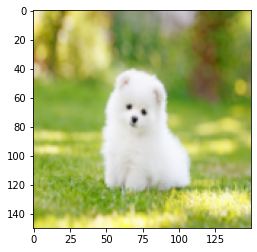

In [ ]:
flat_data = []
url = input('Enter your URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT: {y_out} ')